<a href="https://colab.research.google.com/github/estellasouza/CustomerSegmentation/blob/main/MallCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set Up

## Import Libraries

In [22]:
# Configure to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
from sklearn.cluster import (
    DBSCAN,
    KMeans,
    AgglomerativeClustering,
    MeanShift,
)
from sklearn.metrics import (
    silhouette_score,
    rand_score,
)


## Load Data

In [23]:
# Loading data from github repository

# url with location of data
url = "https://raw.githubusercontent.com/estellasouza/CustomerSegmentation/main/Mall_Customers.csv"

# Reading CSV file
dataset = pd.read_csv(url, encoding='unicode_escape')

# Printing first 5 lines to verify the attributes
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
# Checking the number of entries, columns and their indeces, the data types, and any number of null count per column
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

No null inputs in the data set.

## Initial Data Prep

In [25]:
# Renaming some columns
dataset.rename(columns={'Annual Income (k$)':'Annual_Income_k',
                        'Spending Score (1-100)':'Spending_Score',
                        },inplace=True)

Understanding the customer ID column.

In [26]:
# Get number of unique entries in customerID to see if there are doubles

dataset['CustomerID'].nunique()

200

All unique customer entries.

# Exploratory Data Analysis

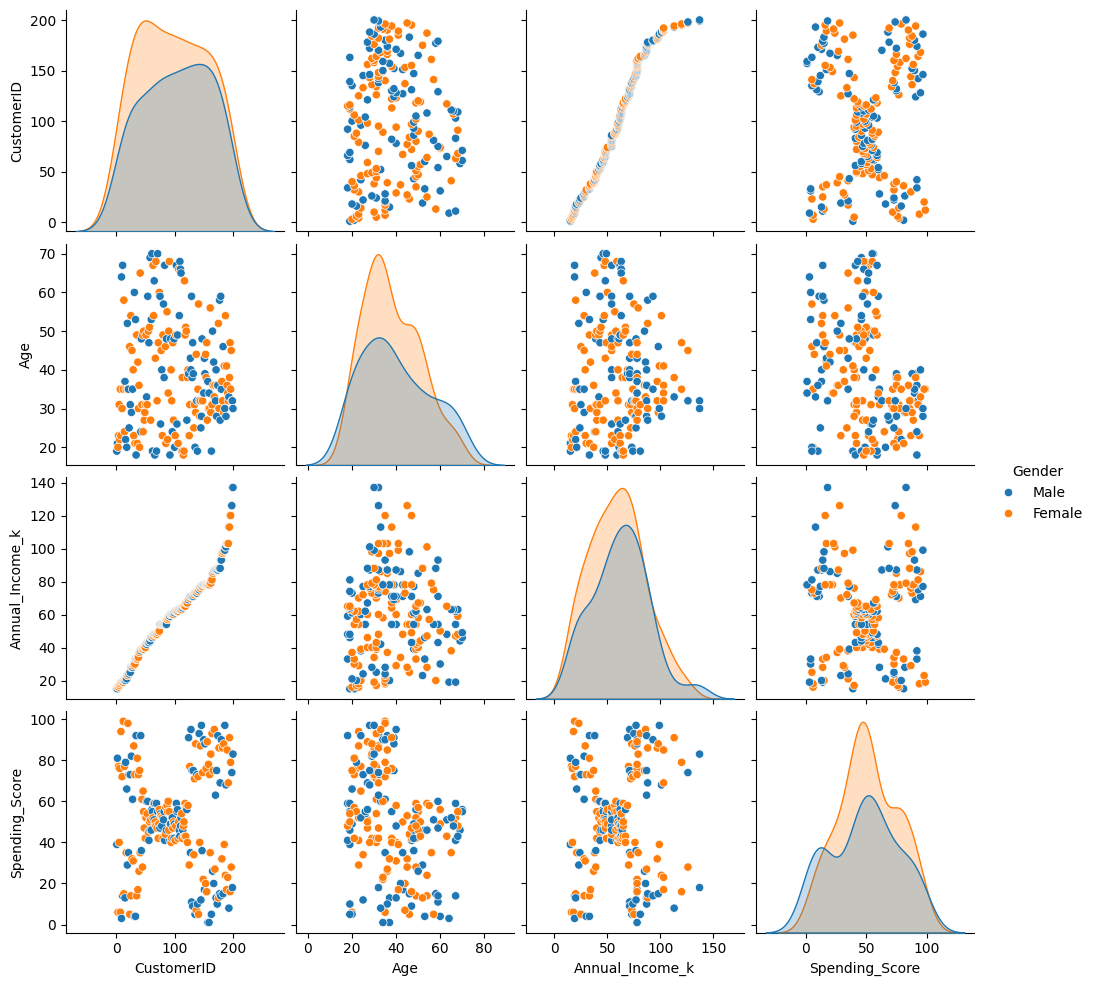

In [27]:
sns.pairplot(data=dataset,hue='Gender')

We see possible 5 clusters based on annual income and spending score. There doesn't seem to be any difference due to gender. Let's now test multiple algorithms to understand how to group them.

In [34]:
# Get array of attributes to be used

X = dataset[['Age','Annual_Income_k','Spending_Score']].values

# Cluster Separation

In [46]:
# Elbow method

inertia = []
kclusters = []
avg_silhouette = []
for i in range(10):
  kclusters.append(i+2)
  kmeans = KMeans(n_clusters = i+2, init = 'k-means++')
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)



Text(0, 0.5, 'Inertia')

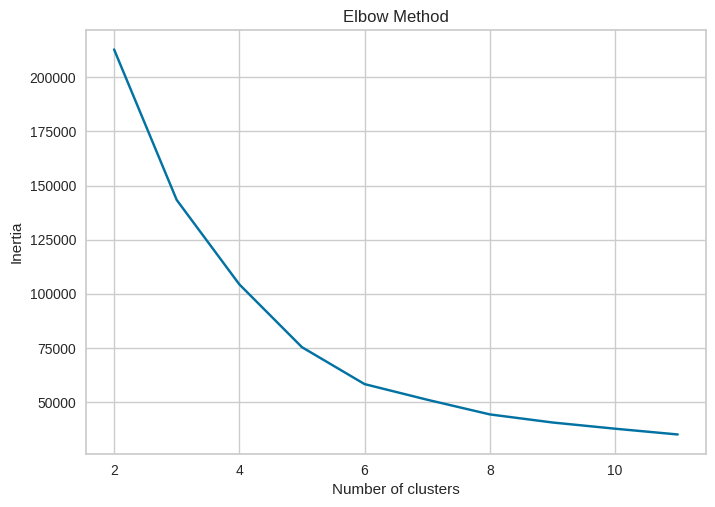

In [47]:
# Plot inertia vs number of clusters
plt.plot(kclusters,inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

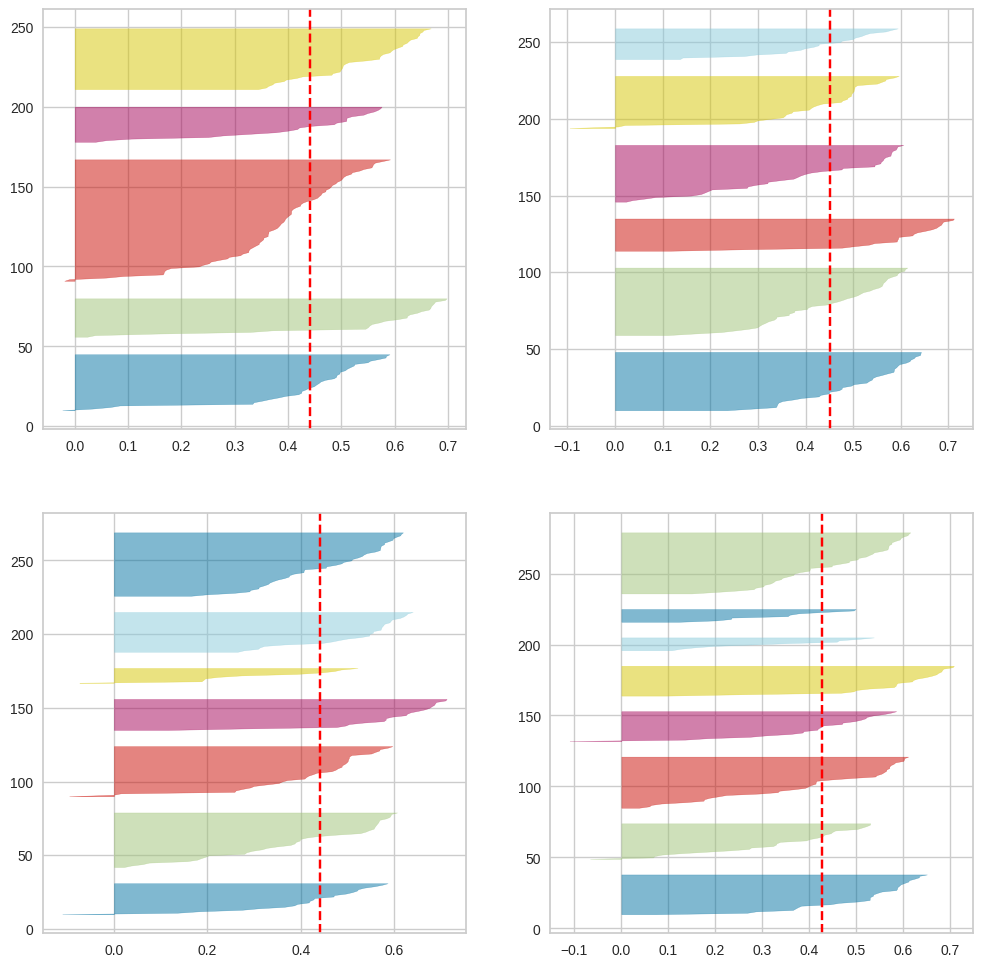

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

nclusters = [5,6,7,8]
fig, axs = plt.subplots(2, 2, figsize=(12,12))
counter = 0
for i in nclusters:
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axs[counter//2][counter%2])
  visualizer.fit(X)
  counter += 1

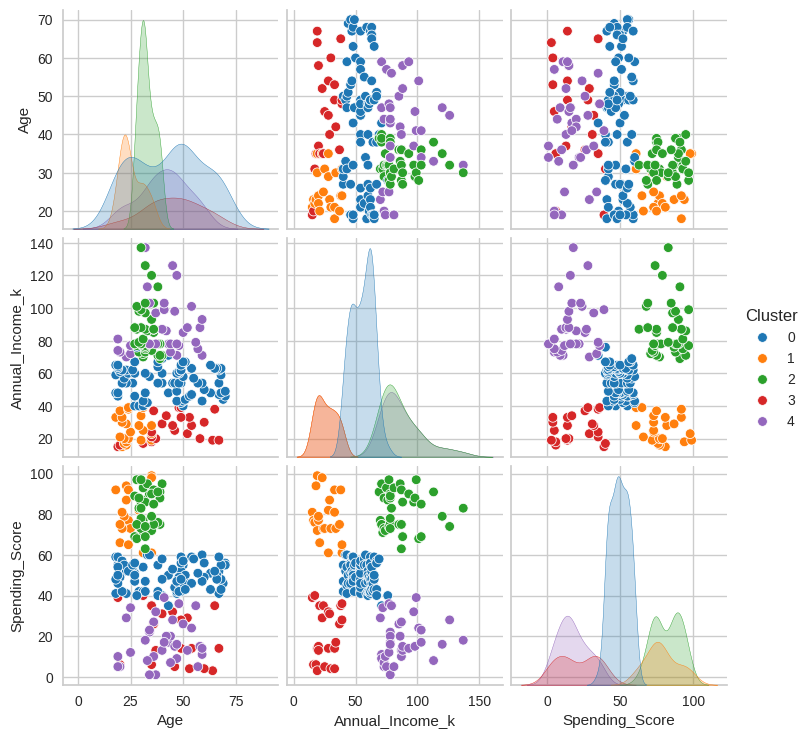

In [57]:
# Plotting attributes divided in 5 clusters

kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y = kmeans.fit_predict(X)

df_clusters = dataset.copy()
df_clusters['Cluster'] = y

sns.pairplot(data=df_clusters[['Age','Annual_Income_k','Spending_Score','Cluster']], hue="Cluster", palette = "tab10")

In [60]:
df_clusters.groupby('Cluster')[['Age','Annual_Income_k','Spending_Score']].agg(['mean','std'])

Age            Annual_Income_k            Spending_Score  \
              mean        std            mean        std           mean   
Cluster                                                                   
0        43.088608  16.478572       55.291139   8.710665      49.569620   
1        25.521739   5.273170       26.304348   7.893811      78.565217   
2        32.692308   3.728650       86.538462  16.312485      82.128205   
3        45.217391  13.228607       26.304348   7.893811      20.913043   
4        40.666667  11.496583       87.750000  16.387059      17.583333   

                    
               std  
Cluster             
0         6.242295  
1        10.953729  
2         9.364489  
3        13.017167  
4        10.204691

# Result Analysis

Based on the clusters found, we can see that the `KMeans` algorithm has identified the five clusters we identified based on annual income and the spending score. We can now perform a qualitative analysis to describe the clusters.

The highest spending clusters (clusters 1 and 2), are younger customers, with average ages of ~25 and 33 years old, respectively.

The highest income customers are divided in two groups: low and high spending. It would be interesting to gather additional information to understand the difference in behavior between these two groups. One potential indicator is age, as one of the groups of high income is clustered at younger ages, potentially indicating high-earning young professionals without families and more disposable income.